# Final Assignment 

Take care, that collaboration in solving the assignment is not allowed and can lead to non-passing of the asssigment. I will check the solutions for similarities. Solve the tasks before October 30th 2022. You are only allowed to import the following modules:

In [35]:
#Submitted by: Md Asifuzzaman Jishan
#ID: 224458 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


import statsmodels.api as sm
import statsmodels.formula.api as smf

import pickle

from selenium import webdriver
import json

## 1. Data preprocessing and plots

**1.1** Import 'players_21.csv' as a pandas data dataframe. Define a column ("year_born") that contains the year of birth of each player as an integer.

In [36]:
#load dataset and show first 5 data
df = pd.read_csv('C:/Users/Jishan/OneDrive - Technische Universität Dortmund/Desktop/Final Assignment/Data/players_21.csv')
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [37]:
df.columns = df.columns.str.strip()
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

In [38]:
#define year_born column
df['dob'].value_counts(dropna=True) 
value = df['dob']
df['year_born'] = value
df['year_born'].head(10)

0    1987-06-24
1    1985-02-05
2    1993-01-07
3    1988-08-21
4    1992-02-05
5    1991-06-28
6    1998-12-20
7    1992-04-30
8    1991-07-08
9    1992-10-02
Name: year_born, dtype: object

In [39]:
#Convert to integer
df['year_born'] = pd.to_datetime(df['year_born']).dt.strftime('%Y%m%d').astype(int)
df['year_born'].head(10)

0    19870624
1    19850205
2    19930107
3    19880821
4    19920205
5    19910628
6    19981220
7    19920430
8    19910708
9    19921002
Name: year_born, dtype: int32

**1.2** Show the most valuable player for each nation ('nationality'). Display the position in the national team ('nation_position'), the name ('short_name'), and the market value in millions.

In [40]:
#Show the most valuable player for each nation ('nationality')
df.sort_values(by=['nationality'], axis=0, ascending=True, inplace=True)
tf = df['nationality'].head(5)
print(tf)

7289     Afghanistan
11136    Afghanistan
13154        Albania
14132        Albania
17888        Albania
Name: nationality, dtype: object


In [41]:
#Display the position in the national team ('nation_position'), the name ('short_name'), and the market value in millions

df.sort_values(by=['nation_position', 'short_name', 'value_eur'], axis=0, ascending=True, inplace=True)
nat_position = df['nation_position'].head(3)
print(nat_position)

3366    CAM
650     CAM
547     CAM
Name: nation_position, dtype: object


In [42]:
s_name = df['short_name'].head(3)
print(s_name)

3366    A. Bakasetas
650      A. Carrillo
547       A. Golovin
Name: short_name, dtype: object


In [43]:
value_in_euro = df['value_eur'] 
print(value_in_euro)

3366      3600000
650      12500000
547      16000000
3562            0
34       60000000
           ...   
17114      180000
793       4900000
17600      160000
13994      475000
8659       850000
Name: value_eur, Length: 18944, dtype: int64


**1.3** Show all Clubs ('club_name') of the "German 1. Bundesliga". Sort them by thier total market value ('value_eur
')in descending order. Display the club name, the total market value and the
size of the squad!

In [44]:
df_league_bundesliga = df.loc[(df['league_name'] == 'German 1. Bundesliga')].head(10)
print(df_league_bundesliga)

      sofifa_id                                         player_url  \
162      204923  https://sofifa.com/player/204923/marcel-sabitz...   
1118     201262  https://sofifa.com/player/201262/vladimir-dari...   
709      229237  https://sofifa.com/player/229237/manuel-akanji...   
236      207862  https://sofifa.com/player/207862/matthias-gint...   
1184     232999  https://sofifa.com/player/232999/tyler-adams/2...   
191      190941  https://sofifa.com/player/190941/lukas-hradeck...   
16       167495  https://sofifa.com/player/167495/manuel-neuer/...   
89       185122  https://sofifa.com/player/185122/peter-gulacsi...   
1023     104389  https://sofifa.com/player/104389/rune-almennin...   
54       177683  https://sofifa.com/player/177683/yann-sommer/2...   

       short_name                long_name  age         dob  height_cm  \
162   M. Sabitzer          Marcel Sabitzer   26  1994-03-17        178   
1118    V. Darida          Vladimír Darida   29  1990-08-08        172   
709    

In [45]:
dis_value = df.sort_values(by=['club_name', 'league_name', 'value_eur', 'player_positions'], axis=0, ascending=False, inplace=True)
df_clubs = df['club_name'].head(5)
print(df_clubs)
df_teams = df['league_name'].head(5)
print(df_teams)
df_mark_value = df['value_eur'].head(5)
print(df_mark_value)
df_player_position = df['player_positions'].head(5)
print(df_player_position)

5159    Śląsk Wrocław
6651    Śląsk Wrocław
8710    Śląsk Wrocław
7851    Śląsk Wrocław
7209    Śląsk Wrocław
Name: club_name, dtype: object
5159    Polish T-Mobile Ekstraklasa
6651    Polish T-Mobile Ekstraklasa
8710    Polish T-Mobile Ekstraklasa
7851    Polish T-Mobile Ekstraklasa
7209    Polish T-Mobile Ekstraklasa
Name: league_name, dtype: object
5159    1900000
6651    1000000
8710     925000
7851     800000
7209     775000
Name: value_eur, dtype: int64
5159    RM, ST, LM
6651            RB
8710            ST
7851            CB
7209       RM, CAM
Name: player_positions, dtype: object


**1.4** Filter the dateset for the 1000 most valueable players. Create a new  Plot the minium, the mean, the 99%-quantile,  and the maximum value for each age ('age') group. (Replicate ``'age.pdf'.``)

In [46]:
valu_player = df.sort_values(by=['value_eur'], axis=0, ascending=False, inplace=True)
df_mark_value1 = df['value_eur'].head(1000)
print(df_mark_value1)

6       105500000
4        90000000
5        87000000
3        80000000
11       78000000
          ...    
1221      9500000
1216      9500000
323       9500000
1279      9500000
1294      9000000
Name: value_eur, Length: 1000, dtype: int64


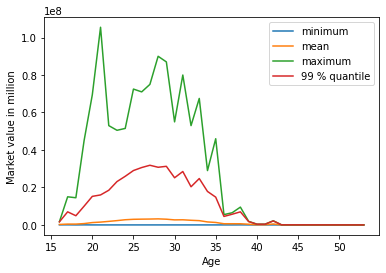

In [47]:
mean = df[["age", "value_eur"]].groupby('age').mean()["value_eur"]
quantile = df[["age", "value_eur"]].groupby('age').quantile(0.99)["value_eur"]
maximum = df[["age", "value_eur"]].groupby('age').max()["value_eur"]
minimum = df[["age", "value_eur"]].groupby('age').min()["value_eur"]
plt.plot(minimum)
plt.plot(mean)
plt.plot(maximum)
plt.plot(quantile)
plt.xlabel('Age')
plt.ylabel('Market value in million')
plt.legend(['minimum', 'mean', 'maximum', '99 % quantile'])
plt.savefig('final_plot.png')
plt.savefig('final_plot.pdf')
plt.show()

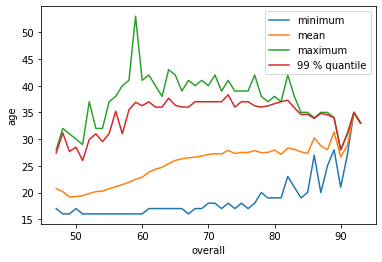

In [48]:
#try for practice
mean = df[["overall", "age"]].groupby('overall').mean()["age"]
quantile = df[["overall", "age"]].groupby('overall').quantile(0.99)["age"]
maximum = df[["overall", "age"]].groupby('overall').max()["age"]
minimum = df[["overall", "age"]].groupby('overall').min()["age"]
plt.plot(minimum)
plt.plot(mean)
plt.plot(maximum)
plt.plot(quantile)
plt.xlabel('overall')
plt.ylabel('age')
plt.legend(['minimum', 'mean', 'maximum', '99 % quantile'])
plt.savefig('final_plot2.png')
plt.savefig('final_plot2.pdf')
plt.show()

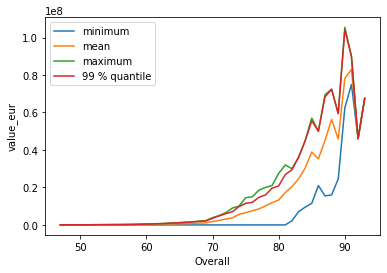

In [49]:
mean = df[["overall", "value_eur"]].groupby('overall').mean()["value_eur"]
quantile = df[["overall", "value_eur"]].groupby('overall').quantile(0.99)["value_eur"]
maximum = df[["overall", "value_eur"]].groupby('overall').max()["value_eur"]
minimum = df[["overall", "value_eur"]].groupby('overall').min()["value_eur"]
plt.plot(minimum)
plt.plot(mean)
plt.plot(maximum)
plt.plot(quantile)
plt.xlabel('Overall')
plt.ylabel('value_eur')
plt.legend(['minimum', 'mean', 'maximum', '99 % quantile'])
plt.savefig('final_plot3.png')
plt.savefig('final_plot3.pdf')
plt.show()

***1.5***  Print the the 3 most frequent jersey numbers ('team_jersey_number') for each team postion ('team_position').

In [50]:
j_num = df.sort_values(by=['team_position', 'team_jersey_number'], axis=0, ascending=True, inplace=True)
df_teams11 = df['team_position'].head(3)
print(df_teams11)
df_teams112 = df['team_jersey_number'].head(3)
print(df_teams112)

7123     CAM
6246     CAM
13788    CAM
Name: team_position, dtype: object
7123     4.0
6246     6.0
13788    6.0
Name: team_jersey_number, dtype: float64


In [51]:
df['team_position'].value_counts()[: 5].sort_values(ascending = False)

SUB    8065
RES    3163
GK      681
LCB     681
RCB     681
Name: team_position, dtype: int64

In [52]:
df['team_jersey_number'].value_counts()[: 5].sort_values(ascending = False)

7.0     603
11.0    601
8.0     600
1.0     591
10.0    589
5.0     587
Name: team_jersey_number, dtype: int64

***1.5*** Add lines of code in the following template to replicate ``'potential.pdf'``. Explain precisely the line where dot_color is determined and why this determination is not computational efficient.

[('w', 0), ('y', 1), ('c', 5), ('g', 20), ('b', 50), ('k', 100)]


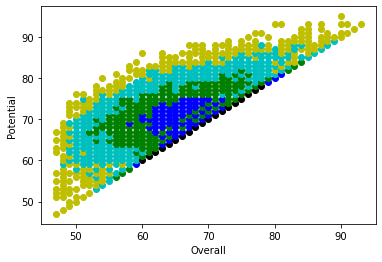

In [53]:
#Create a matrix filled with zeros and dimension 100x100

matrix_dim = [100, 100]
matrix = np.zeros((matrix_dim[0], matrix_dim[1]))

for ov,pot in zip(df['overall'],df['potential']):
    # Increase the value in the matrix in ov row and the pot column by 1
    matrix[ov][pot] += 1 

colors=[('w',0),('y',1),('c',5),('g',20),('b',50),('k',100)]
print(colors)

# Iterate over ov grid
for ov in range(matrix_dim[0]):
    # Iterate over pot grid
    for pot in range(matrix_dim[1]):
    
        # Ignore all iterations where the count is zero
        if(matrix[ov][pot] != 0):
            dot_color = [color for color,value in colors if value <= matrix[ov,pot]][-1]   
        
            # Plot a dot with ov as x,pot as y and dot_color as color
            plt.scatter(ov, pot, c = dot_color)
        
            
#Add the x and y label
plt.xlabel("Overall")
plt.ylabel("Potential")
#Save the figure
plt.savefig('potential_output.pdf')
plt.savefig('potential_output.png')

## 2. Regression

***2.1*** Delete all players where the value below the 25% quartile and drop all players that are not playing for a national team ('nation_position').

In [61]:
df['value_eur'].value_counts(dropna=True) 
quant = df['value_eur']
df['quant'] = quant
df['quant'].head(5)

7123       875000
6246      1000000
13788      250000
11570      230000
1011     10000000
Name: quant, dtype: int64

In [62]:
fs_quant = df['quant'].quantile(0.25)
print(fs_quant)

300000.0


In [63]:
per = 25.0
min_count =  int(((100-per)/100)*df.shape[1] + 1)
modi_df = df.dropna( axis=0, 
                    thresh=min_count)

In [64]:
modi_df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lb,lcb,cb,rcb,rb,year_born,quant,val_eur_log,predicted,residuals
7123,204242,https://sofifa.com/player/204242/michael-barre...,M. Barreto,Michaël Barreto,29,1991-01-18,175,68,France,AC Ajaccio,...,49+2,40+2,40+2,40+2,49+2,19910118,875000,13.681979,NaN,NaN
6246,228908,https://sofifa.com/player/228908/jason-berthom...,J. Berthomier,Jason Berthomier,30,1990-01-06,177,74,France,Clermont Foot 63,...,62+2,58+2,58+2,58+2,62+2,19900106,1000000,13.815511,NaN,NaN
13788,211833,https://sofifa.com/player/211833/toni-lindenha...,T. Lindenhahn,Toni Lindenhahn,29,1990-11-15,177,79,Germany,Hallescher FC,...,65+,62+0,62+0,62+0,65+,19901115,250000,12.429216,NaN,NaN
11570,179579,https://sofifa.com/player/179579/tomasz-nowak/...,T. Nowak,Tomasz Nowak,34,1985-10-30,171,72,Poland,Podbeskidzie Bielsko-Biała,...,54+2,52+2,52+2,52+2,54+2,19851030,230000,12.345835,NaN,NaN
1011,212207,https://sofifa.com/player/212207/nicolae-stanc...,N. Stanciu,Nicolae Claudiu Stanciu,27,1993-05-07,170,63,Romania,SK Slavia Praha,...,64+2,58+2,58+2,58+2,64+2,19930507,10000000,16.118096,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,221865,https://sofifa.com/player/221865/abdallah-goma...,A. Gomaa,Abdallah Gomaa,24,1996-01-10,168,64,Egypt,NaN,...,69+2,64+2,64+2,64+2,69+2,19960110,0,-inf,NaN,NaN
5356,233437,https://sofifa.com/player/233437/sifiso-hlanti...,S. Hlanti,Sfiso Sandile Hlanti,30,1990-05-01,182,78,South Africa,NaN,...,68+2,66+2,66+2,66+2,68+2,19900501,0,-inf,NaN,NaN
14530,251743,https://sofifa.com/player/251743/adit-ginti/21...,A. Ginti,Adit Ginti,26,1993-08-10,170,69,India,NaN,...,59+2,55+2,55+2,55+2,59+2,19930810,0,-inf,NaN,NaN
499,245308,https://sofifa.com/player/245308/mauro-evidio-...,M. Nérez,Mauro Evidio Nérez,32,1988-02-29,178,69,Uruguay,NaN,...,78+2,75+2,75+2,75+2,78+2,19880229,0,-inf,NaN,NaN


***2.2*** Regress the logarithmic player value on the overall strength ('overall') and potential ('potential') of the player.  Which player is the most overvalued (highest residual value)?

In [65]:
df['val_eur_log'] = np.log(df['value_eur'])

C:\Users\Jishan\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [66]:
df['val_eur_log']

7123     13.681979
6246     13.815511
13788    12.429216
11570    12.345835
1011     16.118096
           ...    
3989          -inf
5356          -inf
14530         -inf
499           -inf
17061         -inf
Name: val_eur_log, Length: 18944, dtype: float64

In [67]:
res = smf.ols('val_eur_log ~ overall + potential', data = df).fit()
print(res.summary())
df['predicted']  = res.predict()
df['residuals'] = (df['val_eur_log'] - df['predicted'])
df.sort_values('residuals', ascending = False, inplace= True)

                            OLS Regression Results                            
Dep. Variable:            val_eur_log   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 27 Oct 2022   Prob (F-statistic):                nan
Time:                        02:01:44   Log-Likelihood:                    nan
No. Observations:               18944   AIC:                               nan
Df Residuals:                   18941   BIC:                               nan
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept         nan        nan        nan        n

C:\Users\Jishan\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1666: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


***2.3*** Plot the residuals and logarithmic player value in scatter plot.

In [68]:
print(res.summary())
fig = plt.figure(figsize=(12, 8))

                            OLS Regression Results                            
Dep. Variable:            val_eur_log   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 27 Oct 2022   Prob (F-statistic):                nan
Time:                        02:01:45   Log-Likelihood:                    nan
No. Observations:               18944   AIC:                               nan
Df Residuals:                   18941   BIC:                               nan
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept         nan        nan        nan        n

<Figure size 864x576 with 0 Axes>

In [69]:
fig = sm.graphics.plot_regress_exog(res, 'overall',fig=fig)

C:\Users\Jishan\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


## 3. Password

Create a program that performs the following tasks: (You are only allowed to import time and pickle. Use ``password.py`` as a template.)

1. When you start the program it aks you to enter a password. 

2. The password is stored in a pickle file. If the password is incorrect, it should be requested again. If the password is correct, you can choose between the following options:
    
    2.1. P: Show the information which is stored in 'secret_file.txt'!

    2.2. C: Change the password.

    2.3. L: Lock the program. (Go back to password request.)

    2.4. X: Exit the program.

3. If there is no pickle file with a password, it should ask you to set a new password and then store it into the pickle file.

4. If one enters the wrong password six times in row, it should wait for 10 seconds until it shows the message. 

5. It should check if the password has a minimum length of 10 and if consists of at least one letter and ask for confirmation. It should also print if the requirement is fulfilled.






In [30]:
import pickle
import time
from termcolor import colored

def change_pw():
    while True:
        new_password = input('Please set your password: \n')
        if len(new_password) < 10:
            print('Password has to have minimum 10 character.')
            continue
        else:
            print('Congratulations!')
        if new_password=="E":
            continue
        if new_password != input('Confirm password: \n'):
            print(colored('Passwords must be equal to the previous password.','red'))
            continue
        pickle.dump(new_password, open(r'C:\Users\Jishan\OneDrive - Technische Universität Dortmund\Desktop\Final Assignment\pw_file.p', 'wb'))
        print('Password successfully changed.')
        return new_password

failures=0
exit_flag = False

while True:
    try:
        password = pickle.load(open(r'C:\Users\Jishan\OneDrive - Technische Universität Dortmund\Desktop\Final Assignment\pw_file.p', 'rb') )
    except:
        password = change_pw()

    enter_password= input('Enter the password. (Or enter "E" to exit.)\n')


    if enter_password == password:
        while True:
            option = input('Enter "P" to show secret file, Enter "C" to change the password, Enter "L" to lock, Enter "E" to exit the programm.\n').upper()
            
            if option == "P": 
                secret_file = open(r'C:\Users\Jishan\OneDrive - Technische Universität Dortmund\Desktop\Final Assignment\password-20221001\secret_file.txt', 'r', encoding='utf8')
                secret_file_content = secret_file.read()
                print(secret_file_content)
                secret_file.close()
                continue

            if option == "C":
                password = change_pw()

            if option == "L":
                break
                
            if option == "E":
                exit_flag = True
                break                   
                            
            print(colored('No valid not detected', 'red'))
        if exit_flag :
            break
    
    elif enter_password == "E":
        break        
    else:
        failures += 1
        if failures == 6:
            time.sleep(10)
            failures = 0
        print(colored('Wrong Password!', 'red'))

Please set your password: 
123456789
Password has to have minimum 10 character.
Please set your password: 
1234567890
Congratulations!
Confirm password: 
1234567890
Password successfully changed.
Enter the password. (Or enter "E" to exit.)
1234567890
Enter "P" to show secret file, Enter "C" to change the password, Enter "L" to lock, Enter "E" to exit the programm.
P
“Three may keep a secret, if two of them are dead.”
“A good friend keeps your secrets for you. A best friend helps you keep your own secrets.”
“Man is not what he thinks he is, he is what he hides.”
“If you want to keep a secret, you must also hide it from yourself.”
“Don't trust people who tell you other people's secrets.”
“Books let us into their souls and lay open to us the secrets of our own."
“Some secrets are meant to be known- but once known you can never forget them.”
“Secrets are generally terrible. Beauty is not hidden--only ugliness and deformity.”
“We are bound by the secrets we share.”
“Women are better at keep

## 4. Webscraping

Create a program that takes the date in the format MM-DD as an input and queries all people on the English-language Wikipedia (for example https://en.wikipedia.org/wiki/July_12) that are born on that day and saves it in a JSON file. (Note: See ``'07-12.json'`` as an example file.)

In [70]:
chrome_path=r'C:\Users\Jishan\OneDrive - Technische Universität Dortmund\Desktop\PY Block\Day-4\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)

C:\Users\Jishan\AppData\Local\Temp/ipykernel_12924/1884576983.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)


In [71]:
date='07-12'
month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']
link = 'https://en.wikipedia.org/wiki/July_12'
res = driver.get(link)

In [72]:
from selenium.webdriver.common.by import By
element=driver.find_element(By.ID,'content')
print(element)
print(element.text)

<selenium.webdriver.remote.webelement.WebElement (session="6342cdf6ed0a0f15d8d1dae5efd30ec2", element="c9afb457-993e-45d7-81be-9755051a56bb")>
July 12
From Wikipedia, the free encyclopedia
Jump to navigation
Jump to search
<< July >>
Su Mo Tu We Th Fr Sa
1 2
3 4 5 6 7 8 9
10 11 12 13 14 15 16
17 18 19 20 21 22 23
24 25 26 27 28 29 30
31  
2022
July 12 in recent years
  2022 (Tuesday)
  2021 (Monday)
  2020 (Sunday)
  2019 (Friday)
  2018 (Thursday)
  2017 (Wednesday)
  2016 (Tuesday)
  2015 (Sunday)
  2014 (Saturday)
  2013 (Friday)
July 12 is the 193rd day of the year (194th in leap years) in the Gregorian calendar; 172 days remain until the end of the year.
Contents
1 Events
1.1 Pre-1600
1.2 1601–1900
1.3 1901–present
2 Births
2.1 Pre-1600
2.2 1601–1900
2.3 1901–present
3 Deaths
3.1 Pre-1600
3.2 1601–1900
3.3 1901–present
4 Holidays and observances
5 References
6 External links
Events[edit]
Pre-1600[edit]
70 – The armies of Titus attack the walls of Jerusalem after a six-month siege.

In [73]:
element=driver.find_element(By.ID,'Events')
print(element)
print(element.text)

<selenium.webdriver.remote.webelement.WebElement (session="6342cdf6ed0a0f15d8d1dae5efd30ec2", element="cb7a31b3-912a-415e-9c77-290fa2362687")>
Events


In [74]:
caths = ['Events','Births','Deaths']
data=[]
cath_index=0
last_year=-10e10
for element in driver.find_elements(By.TAG_NAME,'li'):
    try:
        text=element.text
        if ' – '  in text:
            text_split = text.split(' – ')
            year = text_split[0]
            year = -int(year[:year.find(' ')]) if 'BC' in year else int(year)
            person = text_split[1].split(',')[0]
            discription = text_split[1].split(',')[1]
            json_file = {"Year": year , 
                         "Person": person , 
                         "Description": discription}

            if year<last_year-1000:
                cath_index+=1
            
            last_year=year
            if caths[cath_index]=='Births':
                data.append(json_file)
            
    except Exception as e:
        pass
print("Success.")
json.dump(data,open(date+".json",'w'))
print("Success. File saved as a JSON!")

Success.
Success. File saved as a JSON!


#Done